In [1]:
import numpy as np
from tabulate import tabulate

def print_state_index_map(size):
    state_map = np.arange(size * size).reshape(size, size)

    print(f"\nState Index Map ({size}x{size}):")
    table = tabulate(state_map, tablefmt="grid", numalign="right")
    print(table)

print_state_index_map(size=10)



State Index Map (10x10):
+----+----+----+----+----+----+----+----+----+----+
|  0 |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |
+----+----+----+----+----+----+----+----+----+----+
| 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 |
+----+----+----+----+----+----+----+----+----+----+
| 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 |
+----+----+----+----+----+----+----+----+----+----+
| 30 | 31 | 32 | 33 | 34 | 35 | 36 | 37 | 38 | 39 |
+----+----+----+----+----+----+----+----+----+----+
| 40 | 41 | 42 | 43 | 44 | 45 | 46 | 47 | 48 | 49 |
+----+----+----+----+----+----+----+----+----+----+
| 50 | 51 | 52 | 53 | 54 | 55 | 56 | 57 | 58 | 59 |
+----+----+----+----+----+----+----+----+----+----+
| 60 | 61 | 62 | 63 | 64 | 65 | 66 | 67 | 68 | 69 |
+----+----+----+----+----+----+----+----+----+----+
| 70 | 71 | 72 | 73 | 74 | 75 | 76 | 77 | 78 | 79 |
+----+----+----+----+----+----+----+----+----+----+
| 80 | 81 | 82 | 83 | 84 | 85 | 86 | 87 | 88 | 89 |
+----+----+----+----+----+----+----+--

In [2]:
import numpy as np
from tabulate import tabulate

def print_reward_map_table(size):
    reward_map = np.full((size, size), -1, dtype=int)

    goal_state_index = size * size - 1
    goal_row = goal_state_index // size
    goal_col = goal_state_index % size
    reward_map[goal_row, goal_col] = 10 

    print(f"\nReward Map ({size}x{size}):")

    table = tabulate(reward_map, tablefmt="grid", numalign="right")

    print(table)

print_reward_map_table(size=10)


Reward Map (10x10):
+----+----+----+----+----+----+----+----+----+----+
| -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 |
+----+----+----+----+----+----+----+----+----+----+
| -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 |
+----+----+----+----+----+----+----+----+----+----+
| -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 |
+----+----+----+----+----+----+----+----+----+----+
| -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 |
+----+----+----+----+----+----+----+----+----+----+
| -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 |
+----+----+----+----+----+----+----+----+----+----+
| -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 |
+----+----+----+----+----+----+----+----+----+----+
| -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 |
+----+----+----+----+----+----+----+----+----+----+
| -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 |
+----+----+----+----+----+----+----+----+----+----+
| -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 |
+----+----+----+----+----+----+----+----+--

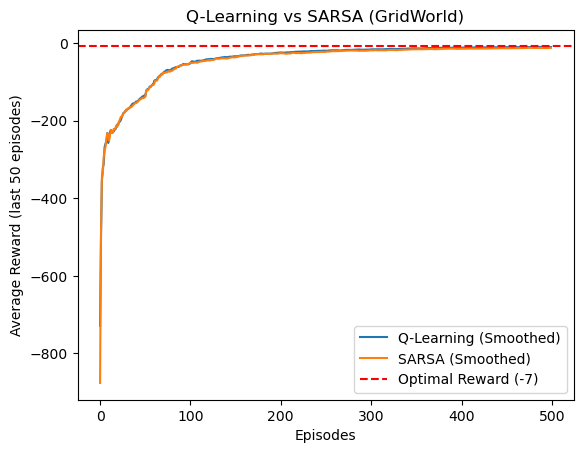

In [ ]:
import torch
import matplotlib.pyplot as plt

class GridWorld:
    def __init__(self, size=10):
        self.size = size
        self.reset()

    def reset(self):
        """Reset the agent to the start position."""
        self.agent_position = 0  
        return self.agent_position

    def step(self, action):
        """Take a step in the environment based on the action."""
        if action == 0 and self.agent_position % self.size > 0:  # Left
            self.agent_position -= 1
        elif action == 1 and self.agent_position % self.size < self.size - 1:  # Right
            self.agent_position += 1
        elif action == 2 and self.agent_position >= self.size:  # Up
            self.agent_position -= self.size
        elif action == 3 and self.agent_position < self.size * (self.size - 1):  # Down
            self.agent_position += self.size

        done = self.agent_position == self.size * self.size - 1  
        reward = 10 if done else -1
        return self.agent_position, reward, done
    
def get_action(Q, state, epsilon):
    """Select action using epsilon-greedy policy."""
    if torch.rand(1).item() < epsilon:  
        action_idx = torch.randint(4, (1,)).item()
    else:  
        action_idx = torch.argmax(Q[state]).item()
    return action_idx

def q_learning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = torch.zeros((env.size * env.size, 4))  
    rewards = []

    for ep in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            action_idx = get_action(Q, state, epsilon)
            next_state, reward, done = env.step(action_idx)
            total_reward += reward

            # target = reward + gamma * torch.max(Q[next_state])
            # old_q = Q[state, action_idx]
            # td_error = target - old_q
            # Q[state, action_idx] = old_q + alpha * td_error

            Q[state, action_idx] += alpha * (reward + gamma * torch.max(Q[next_state]) - Q[state, action_idx]) 
            
            state = next_state

        rewards.append(total_reward)

    return Q, rewards

# Wrong SARSA Algorithm
#  After calculating next_action_idx, it discards it for the next iteration's action choice. It recalculates action_idx in the next loop based on state again.
#  This disrupts the on-policy nature of SARSA because you are not consistently using the next action you intended to take in the update for the current state-action pair.

# def sarsa(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
#     Q = torch.zeros((env.size * env.size, 4))  # Q-values table
#     rewards = []
#     for ep in range(episodes):
#         state = env.reset()
#         total_reward = 0
#         done = False

#         while not done:
#                     action_idx = get_action(Q, state, epsilon)
#                     next_state, reward, done = env.step(action_idx)
#                     total_reward += reward

#                     next_action_idx = get_action(Q, next_state, epsilon)
                    
#                     # Q-value update rule
#                     Q[state, action_idx] += alpha * (reward + gamma * Q[next_state, next_action_idx] - Q[state, action_idx])
                    
#                     state = next_state

#         rewards.append(total_reward)

#     return Q, rewards

def sarsa(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = torch.zeros((env.size * env.size, 4)) 
    rewards = []

    for ep in range(episodes):
        state = env.reset()
        action_idx = get_action(Q, state, epsilon) 

        total_reward = 0
        done = False

        while not done:
            next_state, reward, done = env.step(action_idx)
            total_reward += reward

            next_action_idx = get_action(Q, next_state, epsilon)

            Q[state, action_idx] += alpha * (reward + gamma * Q[next_state, next_action_idx] - Q[state, action_idx])

            state = next_state
            action_idx = next_action_idx

        rewards.append(total_reward)

    return Q, rewards

torch.manual_seed(42)

env = GridWorld(size=10)

q_values, q_rewards = q_learning(env, episodes=500, alpha=0.1, gamma=0.9, epsilon=0.1)

sarsa_values, sarsa_rewards = sarsa(env, episodes=500, alpha=0.1, gamma=0.9, epsilon=0.1)

def moving_average(x, window=50):
    return [torch.tensor(x[max(0, i-window):i+1]).float().mean().item() for i in range(len(x))]

plt.plot(moving_average(q_rewards), label="Q-Learning (Smoothed)")
plt.plot(moving_average(sarsa_rewards), label="SARSA (Smoothed)")
optimal = 13 - env.size * 2
plt.axhline(y=optimal, color='red', linestyle='--', label=f'Optimal Reward ({optimal})')
plt.xlabel("Episodes")
plt.ylabel("Average Reward (last 50 episodes)")
plt.legend()
plt.title("Q-Learning vs SARSA (GridWorld)")
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class GridWorld:
    def __init__(self, size=10):
        self.size = size
        self.reset()
    
    def reset(self):
        self.agent_position = 0 
        return self.agent_position
    
    def step(self, action):
        if action == 0 and self.agent_position % self.size > 0: # left
            self.agent_position -= 1
        elif action == 1 and self.agent_position % self.size < self.size - 1: # right
            self.agent_position += 1
        elif action == 2 and self.agent_position >= self.size: # up
            self.agent_position -= self.size
        elif action == 3 and self.agent_position < self.size * (self.size - 1): # down
            self.agent_position += self.size
        
        done = self.agent_position == self.size * self.size - 1
        reward = 10 if done else -1

        return self.agent_position, reward, done

class DeepQLearningAgent:
    def __init__(self, state_size, action_size, learning_rate=0.001, discount_factor=0.99, exploration_rate=1.0, exploration_decay=0.995, exploration_min=0.01):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        self.exploration_min = exploration_min

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(self.device)
        
        self.q_network = nn.Sequential(
            nn.Linear(state_size, 24),
            nn.ReLU(),
            nn.Linear(24, 24),
            nn.ReLU(),
            nn.Linear(24, action_size)
        ).to(self.device) 
        
        self.optimizer = optim.AdamW(self.q_network.parameters(), lr=learning_rate)
        self.loss_fn = nn.MSELoss()

    def get_action(self, state):
        if torch.rand(1).item() < self.exploration_rate:
            return torch.randint(0, self.action_size, (1,)).item()
        with torch.no_grad():
            state_tensor = F.one_hot(torch.tensor(state), self.state_size).float().to(self.device)
            q_values = self.q_network(state_tensor)
            return torch.argmax(q_values).item()

    def train(self, state, action, reward, next_state, done):
        state_tensor = F.one_hot(torch.tensor(state), self.state_size).float().to(self.device)  
        next_state_tensor = F.one_hot(torch.tensor(next_state), self.state_size).float().to(self.device)
        
        current_q_values = self.q_network(state_tensor)
        
        with torch.no_grad():
            next_q_values = self.q_network(next_state_tensor)
            max_next_q_value = torch.max(next_q_values)
            target_q_value = reward + (self.discount_factor * max_next_q_value * (not done)) 

        loss = self.loss_fn(current_q_values[action], target_q_value)
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

def train_dqn_agent(episodes=500):
    env = GridWorld()
    agent = DeepQLearningAgent(
        state_size=env.size**2,
        action_size=4
    )
    
    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False
        
        while not done:
            action = agent.get_action(state)
            next_state, reward, done = env.step(action)
            agent.train(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
        
        agent.exploration_rate = max(
            agent.exploration_min,
            agent.exploration_rate * agent.exploration_decay
        )
        
        if (episode+1) % 100 == 0:
            print(f"Episode {episode+1}: Total Reward = {total_reward}, Exploration Rate = {agent.exploration_rate:.3f}")
    
    return agent

torch.manual_seed(42)

print("Training Deep Q-learning Agent:")
trained_agent = train_dqn_agent()

Training Deep Q-learning Agent:
cuda
Episode 100: Total Reward = -93, Exploration Rate = 0.606
Episode 200: Total Reward = -29, Exploration Rate = 0.367
Episode 300: Total Reward = -12, Exploration Rate = 0.222
Episode 400: Total Reward = -7, Exploration Rate = 0.135
Episode 500: Total Reward = -7, Exploration Rate = 0.082


In [5]:
import numpy as np
import torch
import torch.nn.functional as F
from tabulate import tabulate 

def print_q_value_map(agent, size):
    state_size = agent.state_size
    q_value_map = np.zeros((size, size)) 

    with torch.no_grad(): 
        for state in range(state_size):
            state_tensor = F.one_hot(torch.tensor(state), num_classes=state_size).float().to(agent.device)

            q_values = agent.q_network(state_tensor)
            max_q_value = torch.max(q_values).item() 

            row = state // size
            col = state % size

            q_value_map[row, col] = max_q_value

    print(f"Maximum Predicted Q-Value Map ({size}x{size}):")
    table = tabulate(q_value_map, tablefmt="grid", numalign="right", floatfmt=".2f")
    print(table)

print_q_value_map(trained_agent, 10)

Maximum Predicted Q-Value Map (10x10):
+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| -6.52 | -5.30 | -4.70 | -3.60 | -3.20 | -1.59 | -0.97 | -3.33 | -2.53 | -1.76 |
+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| -5.62 | -4.76 | -3.79 | -2.91 | -1.93 | -1.14 |  0.30 |  0.72 | -1.33 |  1.22 |
+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| -4.32 | -3.71 | -2.86 | -2.01 | -1.20 | -0.30 |  0.72 |  2.00 |  2.98 |  3.85 |
+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| -4.36 | -3.26 | -2.45 | -1.06 | -0.30 |  0.69 |  1.72 |  2.79 |  3.87 |  4.91 |
+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| -3.74 | -2.60 | -1.53 | -0.38 | -0.30 |  1.30 |  2.40 |  3.24 |  3.99 |  5.98 |
+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| -3.59 | -1.44 | -1.24 | -0.23 |  0.86 |  1.24 |  2.10 |  

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
from tabulate import tabulate 

def print_optimal_policy_map(agent, size):
    state_size = agent.state_size
    policy_map = np.full((size, size), '?', dtype=object)

    action_symbols = {
        0: '←', 
        1: '→',  
        2: '↑',  
        3: '↓',  
        'goal': 'G'
    }

    goal_state = state_size - 1

    with torch.no_grad():
        for state in range(state_size):
            row = state // size
            col = state % size

            state_tensor = F.one_hot(torch.tensor(state), num_classes=state_size).float().to(agent.device)
            q_values = agent.q_network(state_tensor)
            best_action_index = torch.argmax(q_values).item()
            policy_map[row, col] = action_symbols[best_action_index]

            if state == goal_state:
                policy_map[row, col] = action_symbols['goal']

    print(f"Optimal Policy Map (Agent's Best Action) ({size}x{size}):")
    table = tabulate(policy_map, tablefmt="grid", stralign="center")
    print(table)

print_optimal_policy_map(trained_agent, 10)

Optimal Policy Map (Agent's Best Action) (10x10):
+---+---+---+---+---+---+---+---+---+---+
| ↓ | ↓ | ↓ | ↓ | ↓ | ↓ | ↓ | ↓ | ↓ | ↓ |
+---+---+---+---+---+---+---+---+---+---+
| → | → | ↓ | ↓ | ↓ | ↓ | ↓ | ↓ | ↓ | ↓ |
+---+---+---+---+---+---+---+---+---+---+
| → | ↓ | ↓ | → | ↓ | ↓ | ↓ | ↓ | ↓ | ↓ |
+---+---+---+---+---+---+---+---+---+---+
| → | → | → | → | → | → | → | → | → | ↓ |
+---+---+---+---+---+---+---+---+---+---+
| → | → | → | → | → | → | → | → | → | ↓ |
+---+---+---+---+---+---+---+---+---+---+
| → | → | ↓ | ↓ | → | → | → | ↓ | → | ↓ |
+---+---+---+---+---+---+---+---+---+---+
| → | → | ↓ | → | → | → | → | → | → | ↓ |
+---+---+---+---+---+---+---+---+---+---+
| → | → | → | → | → | → | → | → | → | ↓ |
+---+---+---+---+---+---+---+---+---+---+
| → | → | → | → | → | → | → | → | ↓ | ↓ |
+---+---+---+---+---+---+---+---+---+---+
| → | → | → | → | → | → | → | → | → | G |
+---+---+---+---+---+---+---+---+---+---+


In [ ]:
import numpy as np
from tabulate import tabulate

def print_grid_with_walls_and_rewards(size, walls=None):
    reward_map = np.full((size, size), -1, dtype=int)

    goal_state_index = size * size - 1
    goal_row = goal_state_index // size
    goal_col = goal_state_index % size
    reward_map[goal_row, goal_col] = 10

    grid = np.full((size, size), '.', dtype='<U1') 

    if walls is not None:
        for wall in walls:
            row = wall // size
            col = wall % size
            grid[row, col] = 'X'
    
    grid[goal_row, goal_col] = 'G'
    
    for row in range(size):
        for col in range(size):
            if grid[row, col] == '.':
                grid[row, col] = str(reward_map[row, col])
    
    print(f"\nGrid Map with Walls and Rewards ({size}x{size}):")
    table = tabulate(grid.tolist(), tablefmt="grid", numalign="center", stralign="center")
    print(table)

walls = [20,21,22,23,24,25,26,27,59,58,57,56,55,54,53,52,62,72,82,75,85,95] 
print_grid_with_walls_and_rewards(size=10, walls=walls)



Grid Map with Walls and Rewards (10x10):
+---+---+---+---+---+---+---+---+---+---+
| - | - | - | - | - | - | - | - | - | - |
+---+---+---+---+---+---+---+---+---+---+
| - | - | - | - | - | - | - | - | - | - |
+---+---+---+---+---+---+---+---+---+---+
| X | X | X | X | X | X | X | X | - | - |
+---+---+---+---+---+---+---+---+---+---+
| - | - | - | - | - | - | - | - | - | - |
+---+---+---+---+---+---+---+---+---+---+
| - | - | - | - | - | - | - | - | - | - |
+---+---+---+---+---+---+---+---+---+---+
| - | - | X | X | X | X | X | X | X | X |
+---+---+---+---+---+---+---+---+---+---+
| - | - | X | - | - | - | - | - | - | - |
+---+---+---+---+---+---+---+---+---+---+
| - | - | X | - | - | X | - | - | - | - |
+---+---+---+---+---+---+---+---+---+---+
| - | - | X | - | - | X | - | - | - | - |
+---+---+---+---+---+---+---+---+---+---+
| - | - | - | - | - | X | - | - | - | G |
+---+---+---+---+---+---+---+---+---+---+


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class GridWorld:
    def __init__(self, size=10, stochasticity=0.2, walls=None):
        self.size = size
        self.stochasticity = stochasticity
        self.manual_walls = walls  
        self.reset()

    def reset(self):
        self.agent_position = 0  
        self.goal_position = self.size * self.size - 1 

        if self.manual_walls is not None:
            self.walls = set(self.manual_walls)
        else:
            self.walls = set()

        return self.agent_position

    def step(self, action):
        if torch.rand(1).item() < self.stochasticity:
            action = torch.randint(0, 4, (1,)).item() 

        next_position = self.agent_position

        if action == 0 and self.agent_position % self.size > 0:
            next_position -= 1  # Left
        elif action == 1 and self.agent_position % self.size < self.size - 1:
            next_position += 1  # Right
        elif action == 2 and self.agent_position >= self.size:
            next_position -= self.size  # Up
        elif action == 3 and self.agent_position < self.size * (self.size - 1):
            next_position += self.size  # Down

        if next_position not in self.walls:
            self.agent_position = next_position

        done = self.agent_position == self.goal_position
        reward = 10 if done else -1
        return self.agent_position, reward, done

class DeepQLearningAgent:
    def __init__(self, state_size, action_size, learning_rate=0.001, discount_factor=0.99, exploration_rate=1.0, exploration_decay=0.995, exploration_min=0.01):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        self.exploration_min = exploration_min

        print(self.device)
        
        self.q_network = nn.Sequential(
            nn.Linear(state_size, 24),
            nn.ReLU(),
            nn.Linear(24, 24),
            nn.ReLU(),
            nn.Linear(24, action_size)
        ).to(self.device) 
        
        self.optimizer = optim.AdamW(self.q_network.parameters(), lr=learning_rate)
        self.loss_fn = nn.MSELoss()

    def get_action(self, state):
        if torch.rand(1).item() < self.exploration_rate:
            return torch.randint(0, self.action_size, (1,)).item()
        with torch.no_grad():
            state_tensor = F.one_hot(torch.tensor(state), self.state_size).float().to(self.device)
            q_values = self.q_network(state_tensor)
            return torch.argmax(q_values).item()

    def train(self, state, action, reward, next_state, done):
        state_tensor = F.one_hot(torch.tensor(state), self.state_size).float().to(self.device)  
        next_state_tensor = F.one_hot(torch.tensor(next_state), self.state_size).float().to(self.device)
        
        current_q_values = self.q_network(state_tensor)
        
        with torch.no_grad():
            next_q_values = self.q_network(next_state_tensor)
            max_next_q_value = torch.max(next_q_values)
            target_q_value = reward + (self.discount_factor * max_next_q_value * (not done)) 

        loss = self.loss_fn(target_q_value, current_q_values[action])
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

def train_dqn_agent(episodes=500):
    walls = [20,21,22,23,24,25,26,27,59,58,57,56,55,54,53,52,62,72,82,75,85,95] 

    env = GridWorld(size=10, stochasticity=0.2, walls=walls)
    agent = DeepQLearningAgent(
        state_size=env.size**2,
        action_size=4
    )
    
    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0
        
        while not done:
            action = agent.get_action(state)
            next_state, reward, done = env.step(action)
            agent.train(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
        
        agent.exploration_rate = max(
            agent.exploration_min,
            agent.exploration_rate * agent.exploration_decay
        )
        
        if (episode+1) % 100 == 0:
            print(f"Episode {episode+1}: Total Reward = {total_reward}, Exploration Rate = {agent.exploration_rate:.3f}")
    
    return agent

torch.manual_seed(42)

print("Training Deep Q-learning Agent:")
trained_agent = train_dqn_agent()


Training Deep Q-learning Agent:
cuda
Episode 100: Total Reward = -351, Exploration Rate = 0.606
Episode 200: Total Reward = -490, Exploration Rate = 0.367
Episode 300: Total Reward = -488, Exploration Rate = 0.222
Episode 400: Total Reward = -308, Exploration Rate = 0.135
Episode 500: Total Reward = -395, Exploration Rate = 0.082


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class GridWorld:
    def __init__(self, size=10, stochasticity=0.2, walls=None):
        self.size = size
        self.stochasticity = stochasticity
        self.manual_walls = walls  
        self.reset()

    def reset(self):
        self.agent_position = 0  
        self.goal_position = self.size * self.size - 1  

        if self.manual_walls is not None:
            self.walls = set(self.manual_walls)
        else:
            self.walls = set()

        return self.agent_position

    def step(self, action):
        if torch.rand(1).item() < self.stochasticity:
            action = torch.randint(0, 4, (1,)).item()

        next_position = self.agent_position

        if action == 0 and self.agent_position % self.size > 0:
            next_position -= 1  # Left
        elif action == 1 and self.agent_position % self.size < self.size - 1:
            next_position += 1  # Right
        elif action == 2 and self.agent_position >= self.size:
            next_position -= self.size  # Up
        elif action == 3 and self.agent_position < self.size * (self.size - 1):
            next_position += self.size  # Down

        if next_position not in self.walls:
            self.agent_position = next_position

        done = self.agent_position == self.goal_position
        reward = 10 if done else -1
        return self.agent_position, reward, done

class QNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super().__init__()
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, action_size)

    def forward(self, state_one_hot):
        x = F.relu(self.fc1(state_one_hot))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

class DeepQLearningAgent:
    def __init__(self, state_size, action_size, learning_rate=0.001, discount_factor=0.99, exploration_rate=1.0, exploration_decay=0.998,  exploration_min=0.01, target_update_frequency=100):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        self.exploration_min = exploration_min
        self.target_update_frequency = target_update_frequency
        self.train_step_counter = 0 

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {self.device}")

        self.q_network = QNetwork(state_size, action_size).to(self.device)

        self.target_q_network = QNetwork(state_size, action_size).to(self.device)
        self.update_target_network()

        self.optimizer = optim.AdamW(self.q_network.parameters(), lr=learning_rate)
        self.loss_fn = nn.MSELoss()

        self.replay_buffer = []
        self.max_buffer_size = 10000  
        self.batch_size = 64 
        
    def update_target_network(self):
        self.target_q_network.load_state_dict(self.q_network.state_dict())

    def get_action(self, state):
        if torch.rand(1).item() < self.exploration_rate:
            return torch.randint(0, self.action_size, (1,)).item()
        with torch.no_grad():
            state_tensor = F.one_hot(torch.tensor(state, device=self.device), self.state_size).float()
            state_tensor = state_tensor.unsqueeze(0)
            q_values = self.q_network(state_tensor)
            return torch.argmax(q_values, dim=1).item() 

    def store_transition(self, state, action, reward, next_state, done):
        self.replay_buffer.append((state, action, reward, next_state, done))
        
        if len(self.replay_buffer) > self.max_buffer_size:
            self.replay_buffer.pop(0) 
            
        self.train_step_counter += 1
        if len(self.replay_buffer) >= self.batch_size:
            self.train_from_replay()

        if self.train_step_counter % self.target_update_frequency == 0:
            self.update_target_network()

    def train_from_replay(self):
        indices = torch.randperm(len(self.replay_buffer))[:self.batch_size]
        minibatch = [self.replay_buffer[i] for i in indices]

        states, actions, rewards, next_states, dones = zip(*minibatch)

        states_tensor = F.one_hot(torch.tensor(states, device=self.device), self.state_size).float()
        next_states_tensor = F.one_hot(torch.tensor(next_states, device=self.device), self.state_size).float()
        actions_tensor = torch.tensor(actions, device=self.device).unsqueeze(1)
        rewards_tensor = torch.tensor(rewards, device=self.device, dtype=torch.float32).unsqueeze(1)
        dones_tensor = torch.tensor(dones, device=self.device, dtype=torch.bool).unsqueeze(1)

        current_q_values = self.q_network(states_tensor).gather(1, actions_tensor)

        with torch.no_grad():
            max_next_q_values = self.target_q_network(next_states_tensor).max(1, keepdim=True)[0]
            target_q_values = rewards_tensor + self.discount_factor * max_next_q_values * (~dones_tensor)

        loss = self.loss_fn(current_q_values, target_q_values)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

def train_dqn_agent(episodes=1000): 
    walls = [20,21,22,23,24,25,26,27,59,58,57,56,55,54,53,52,62,72,82,75,85,95] 

    env = GridWorld(size=10, stochasticity=0.2, walls=walls)
    agent = DeepQLearningAgent(
        state_size=env.size**2,
        action_size=4,
        learning_rate=0.001,
        discount_factor=0.99,
        exploration_decay=0.998, 
        target_update_frequency=100 
    )

    episode_rewards = []

    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0
        step_count = 0 

        while not done:
            action = agent.get_action(state)
            next_state, reward, done = env.step(action)

            agent.store_transition(state, action, reward, next_state, done)

            state = next_state
            total_reward += reward
            step_count += 1

            if step_count > env.size * env.size * 2: 
                 break 

        agent.exploration_rate = max(
            agent.exploration_min,
            agent.exploration_rate * agent.exploration_decay
        )

        episode_rewards.append(total_reward)

        if (episode+1) % 50 == 0: 
            avg_reward = sum(episode_rewards[-50:]) / len(episode_rewards[-50:]) if episode_rewards else 0
            print(f"Episode {episode+1}: Steps = {step_count}, Total Reward = {total_reward:.2f}, Avg Reward (last 50) = {avg_reward:.2f}, Exp Rate = {agent.exploration_rate:.3f}")

    print("Training finished.")
    return agent, episode_rewards 

torch.manual_seed(42)

print("Training Deep Q-learning Agent with Target Network and Experience Replay:")
trained_agent, rewards = train_dqn_agent(episodes=1000)


Training Deep Q-learning Agent with Target Network and Experience Replay:
Using device: cuda
Episode 50: Steps = 201, Total Reward = -201.00, Avg Reward (last 50) = -201.00, Exp Rate = 0.905
Episode 100: Steps = 201, Total Reward = -201.00, Avg Reward (last 50) = -201.00, Exp Rate = 0.819
Episode 150: Steps = 201, Total Reward = -201.00, Avg Reward (last 50) = -200.04, Exp Rate = 0.741
Episode 200: Steps = 201, Total Reward = -201.00, Avg Reward (last 50) = -195.64, Exp Rate = 0.670
Episode 250: Steps = 120, Total Reward = -109.00, Avg Reward (last 50) = -194.52, Exp Rate = 0.606
Episode 300: Steps = 137, Total Reward = -126.00, Avg Reward (last 50) = -100.46, Exp Rate = 0.548
Episode 350: Steps = 168, Total Reward = -157.00, Avg Reward (last 50) = -93.02, Exp Rate = 0.496
Episode 400: Steps = 73, Total Reward = -62.00, Avg Reward (last 50) = -78.68, Exp Rate = 0.449
Episode 450: Steps = 102, Total Reward = -91.00, Avg Reward (last 50) = -72.72, Exp Rate = 0.406
Episode 500: Steps = 90

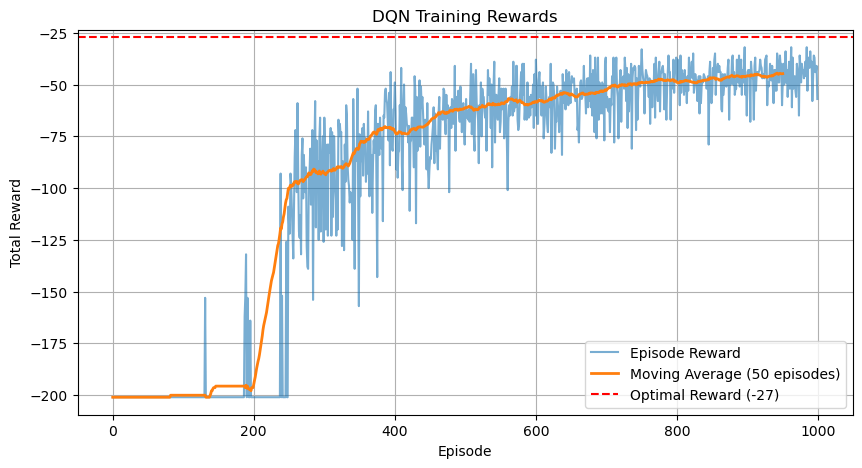

In [3]:
import matplotlib.pyplot as plt
import numpy as np
def moving_average(data, window_size=50):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

plt.figure(figsize=(10, 5))
plt.plot(rewards, label='Episode Reward', alpha=0.6)
plt.plot(moving_average(rewards), label='Moving Average (50 episodes)', linewidth=2)
plt.axhline(y=-27, color='red', linestyle='--', label=f'Optimal Reward (-27)')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("DQN Training Rewards")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
from tabulate import tabulate

def print_optimal_policy_map(agent, size, walls=None):
    state_size = agent.state_size
    policy_map = np.full((size, size), '?', dtype=object)

    action_symbols = {
        0: '←',  
        1: '→',  
        2: '↑',  
        3: '↓',  
        'goal': 'G',
        'wall': 'X'
    }

    wall_set = set(walls) if walls else set()
    goal_state = state_size - 1

    with torch.no_grad():
        for state in range(state_size):
            row = state // size
            col = state % size

            if state == goal_state:
                policy_map[row, col] = action_symbols['goal']
            elif state in wall_set:
                policy_map[row, col] = action_symbols['wall']
            else:
                state_tensor = F.one_hot(torch.tensor(state), num_classes=state_size).float().to(agent.device)
                q_values = agent.q_network(state_tensor)
                best_action_index = torch.argmax(q_values).item()
                policy_map[row, col] = action_symbols[best_action_index]

    print(f"Optimal Policy Map with Walls and Goal ({size}x{size}):")
    table = tabulate(policy_map.tolist(), tablefmt="grid", stralign="center")
    print(table)

walls = [20,21,22,23,24,25,26,27,59,58,57,56,55,54,53,52,62,72,82,75,85,95] 
print_optimal_policy_map(trained_agent, size=10, walls=walls)


Optimal Policy Map with Walls and Goal (10x10):
+---+---+---+---+---+---+---+---+---+---+
| → | → | → | → | → | → | → | → | ↓ | ↓ |
+---+---+---+---+---+---+---+---+---+---+
| → | → | → | → | → | → | → | → | ↓ | ↓ |
+---+---+---+---+---+---+---+---+---+---+
| X | X | X | X | X | X | X | X | ↓ | ↓ |
+---+---+---+---+---+---+---+---+---+---+
| ↓ | ↓ | ↓ | ← | ← | ← | ← | ← | ← | ← |
+---+---+---+---+---+---+---+---+---+---+
| ↓ | ↓ | ← | ← | ← | ← | ← | ← | ← | ← |
+---+---+---+---+---+---+---+---+---+---+
| ↓ | ↓ | X | X | X | X | X | X | X | X |
+---+---+---+---+---+---+---+---+---+---+
| ↓ | ↓ | X | → | → | → | → | → | → | ↓ |
+---+---+---+---+---+---+---+---+---+---+
| ↓ | ↓ | X | → | ↑ | X | ↓ | → | ↓ | ↓ |
+---+---+---+---+---+---+---+---+---+---+
| → | ↓ | X | → | ↑ | X | → | → | → | ↓ |
+---+---+---+---+---+---+---+---+---+---+
| → | → | → | ↑ | ↑ | X | → | → | → | G |
+---+---+---+---+---+---+---+---+---+---+
